In [1]:
%pip install --upgrade pip
%pip install scikit-fuzzy networkx


   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB 682.7 kB/s eta 0:00:03
   - -------------------------------------- 0.1/1.8 MB 440.4 kB/s eta 0:00:04
   - -------------------------------------- 0.1/1.8 MB 573.4 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.8 MB 657.1 kB/s eta 0:00:03
   --- ------------------------------------ 0.2/1.8 MB 704.6 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.8 MB 838.1 kB/s eta 0:00:02
   ------ --------------------------------- 0.3/1.8 MB 886.2 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.8 MB 855.7 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.8 MB 855.7 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.8 MB 855.7 kB/s eta 0:00:02
   ------- --

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt


In [7]:
# Définition des variables floues 

# Température entree 1
temperature = ctrl.Antecedent(np.arange(10, 51, 1), 'temperature')
temperature['froid'] = fuzz.trimf(temperature.universe, [10, 10, 20])
temperature['agreable'] = fuzz.trimf(temperature.universe, [15, 25, 30])
temperature['chaud'] = fuzz.trimf(temperature.universe, [27, 50, 50])

# Vitesse (km/h) entree 2
vitesse = ctrl.Antecedent(np.arange(0, 101, 1), 'vitesse')
vitesse['faible'] = fuzz.trimf(vitesse.universe, [0, 0, 40])
vitesse['moyenne'] = fuzz.trimf(vitesse.universe, [30, 50, 70])
vitesse['elevee'] = fuzz.trimf(vitesse.universe, [60, 100, 100])

# Sortie : Confort (de 0 a 10)
confort = ctrl.Consequent(np.arange(0, 11, 1), 'confort')
confort['inconfortable'] = fuzz.trimf(confort.universe, [0, 0, 5])
confort['normal'] = fuzz.trimf(confort.universe, [3, 5, 7])
confort['confortable'] = fuzz.trimf(confort.universe, [6, 10, 10])


C:\Anaconda\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


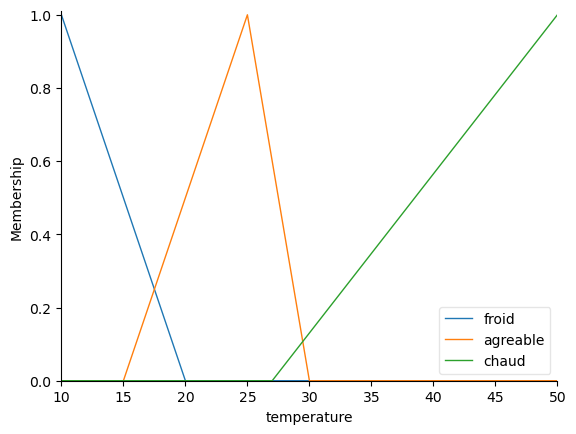

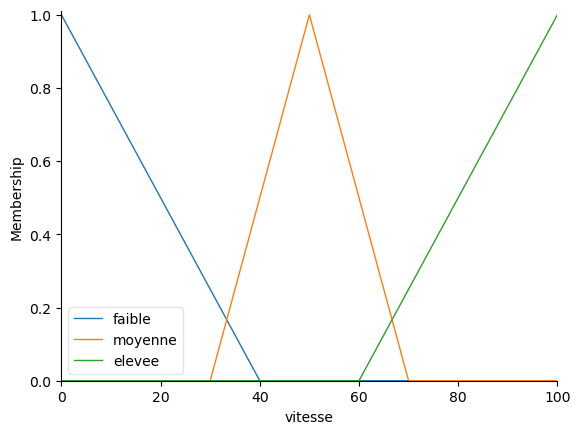

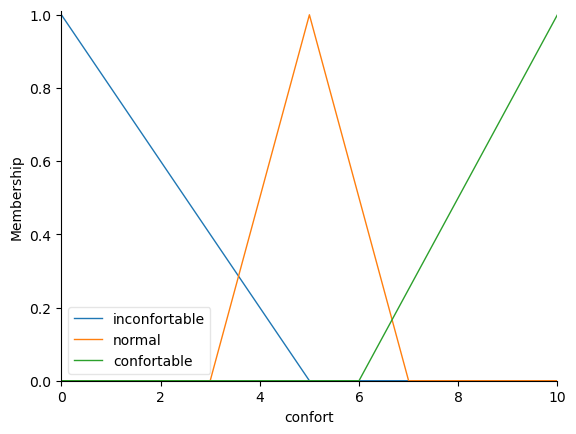

In [9]:
# Visualisation des fonctions d’appartenance

temperature.view()
vitesse.view()
confort.view()


In [11]:
# Définition des règles floues ---
#ruleX = ctrl.Rule(condition, conclusion)


rule1 = ctrl.Rule(temperature['froid'] | vitesse['elevee'], confort['inconfortable'])
rule2 = ctrl.Rule(temperature['agreable'] & vitesse['moyenne'], confort['normal'])
rule3 = ctrl.Rule(temperature['agreable'] & vitesse['faible'], confort['confortable'])
rule4 = ctrl.Rule(temperature['chaud'] & vitesse['moyenne'], confort['confortable'])

# Création du système de contrôle flou
systeme_confort = ctrl.ControlSystem([rule1, rule2, rule3, rule4])  #regroupe toutes les règles pour créer un système d’inférence flou complet.
simulation = ctrl.ControlSystemSimulation(systeme_confort) #prépare le système pour des tests concrets


In [13]:
# Fuzzification des entrées réelles ---

temperature_test = 15 
vitesse_test = 40       

# Attribution des valeurs
simulation.input['temperature'] = temperature_test
simulation.input['vitesse'] = vitesse_test

# --- Calcul flou complet ---
simulation.compute()

print(f"Température = {temperature_test} °C")
print(f"Vitesse = {vitesse_test} km/h")
print(f"→ Niveau de confort (défuzzifié, méthode COG) = {simulation.output['confort']:.2f}")


Température = 15 °C
Vitesse = 40 km/h
→ Niveau de confort (défuzzifié, méthode COG) = 1.94


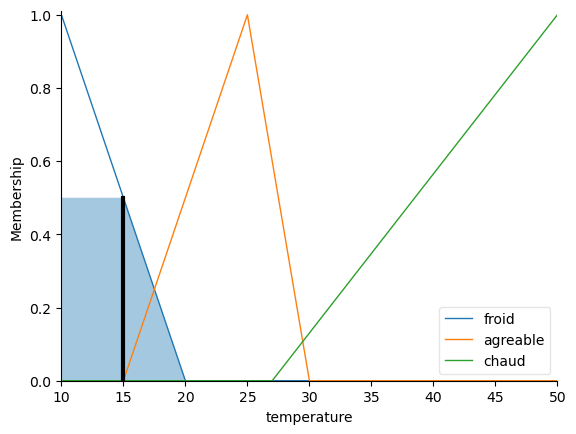

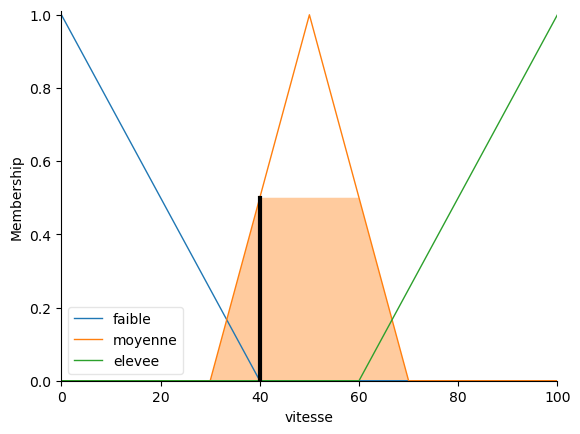

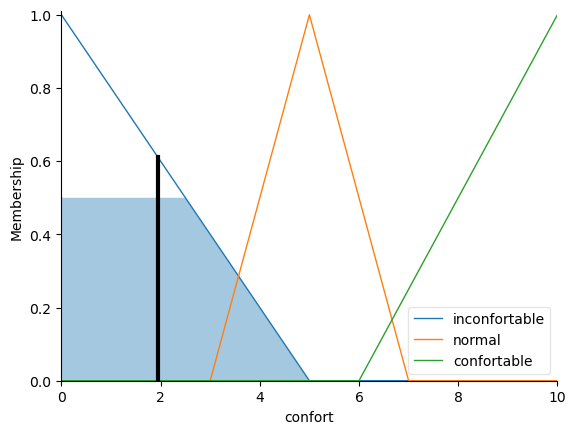

In [15]:
# Visualisation des résultats flous avec projection du COG ---

temperature.view(sim=simulation)
vitesse.view(sim=simulation)
confort.view(sim=simulation)


In [ ]:
simulation.compute()
